# **Project 1 Report**

JALPA KAILA

CS658

## **P1-1. Curse of Dimensionality**

**(a) Generate 1000 points following a uniform distribution under a given dimension, and then compute difference between max and min distance between any pair of points. Hint: Refer to the tutorial “Introduction to Numpy and Pandas” on how to generate random points.**

In [ ]:
# Codes for P1-1(a)

import numpy as np

# Generate 1000 points and compute the difference between max and min distances
def generate_points_and_compute_difference(dimension, num_points=1000):
    # Generate 1000 points with uniform distribution in the given dimension
    points = np.random.uniform(0, 1, (num_points, dimension))

    # Initialize variables to store the maximum and minimum distances
    max_dist = 0
    min_dist = float('inf')

    # Loop through all pairs of points to calculate the distances
    for i in range(num_points):
        for j in range(i + 1, num_points):
            dist = np.linalg.norm(points[i] - points[j])

            # Update max and min distances
            if dist > max_dist:
                max_dist = dist
            if dist < min_dist:
                min_dist = dist

    # Avoid division by zero by ensuring min_dist is greater than 0
    if min_dist > 0:
        # Apply the formula log10((max_dist - min_dist) / min_dist)
        difference = np.log10((max_dist - min_dist) / min_dist)
        return difference
    else:
        return float('inf')  # In case min_dist is 0

# For Example
dimension = 3
difference = generate_points_and_compute_difference(dimension)
print(f"The log10((max_dist - min_dist) / min_dist) difference is: {difference}")


The log10((max_dist - min_dist) / min_dist) difference is: 2.3796702019020577


**(b) Repeat (a) for different dimensions from 2 to 50.**

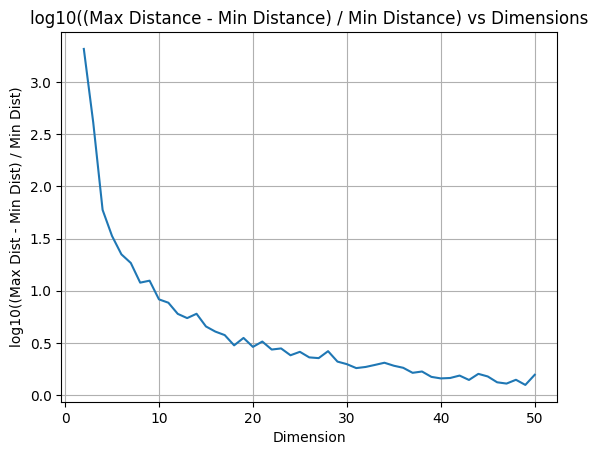

In [ ]:
# Codes for P2-1(b)

import numpy as np
import matplotlib.pyplot as plt

# Generate points and compute the max, min distances
def generate_points_and_compute_distances(dimension, num_points=1000):
    # Generate 1000 points with uniform distribution in the given dimension
    points = np.random.uniform(0, 1, (num_points, dimension))

    # Initialize variables to store the maximum and minimum distances
    max_dist = 0
    min_dist = float('inf')

    # Loop through all pairs of points to calculate the distances
    for i in range(num_points):
        for j in range(i + 1, num_points):
            dist = np.linalg.norm(points[i] - points[j])

            # Update max and min distances
            if dist > max_dist:
                max_dist = dist
            if dist < min_dist:
                min_dist = dist

    # Return max and min distances
    return max_dist, min_dist

# From 2 to 50 dimensions and Initialize an empty list to store the computed Y values for each dimension
dimension_range = range(2, 51)  # From 2 to 50 dimensions
y_values = []

# Loop through each dimension and compute the formula log10((max_dist - min_dist) / min_dist)
for dimension in dimension_range:
    max_dist, min_dist = generate_points_and_compute_distances(dimension)

    # Apply the formula log10((max_dist - min_dist) / min_dist)
    if min_dist > 0:  # Avoid division by zero
        y_value = np.log10((max_dist - min_dist) / min_dist)
        y_values.append(y_value)
        # print(f"Dimension {dimension}: log10((max_dist - min_dist) / min_dist) = {y_value}")
    else:
        y_values.append(float('inf'))  # In case min_dist is 0

# Plot the result
# plt.plot(dimension_range, y_values, marker='o')
plt.plot(dimension_range, y_values)
plt.title("log10((Max Distance - Min Distance) / Min Distance) vs Dimensions")
plt.xlabel("Dimension")
plt.ylabel("log10((Max Dist - Min Dist) / Min Dist)")
plt.grid(True)
plt.show()


Plot log_10(max-min)/min under different number of dimensions.

# **P1-2. The Iris Dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set)**

**(a) Data Visualization. Duplicate the following figure using scatter plot.**

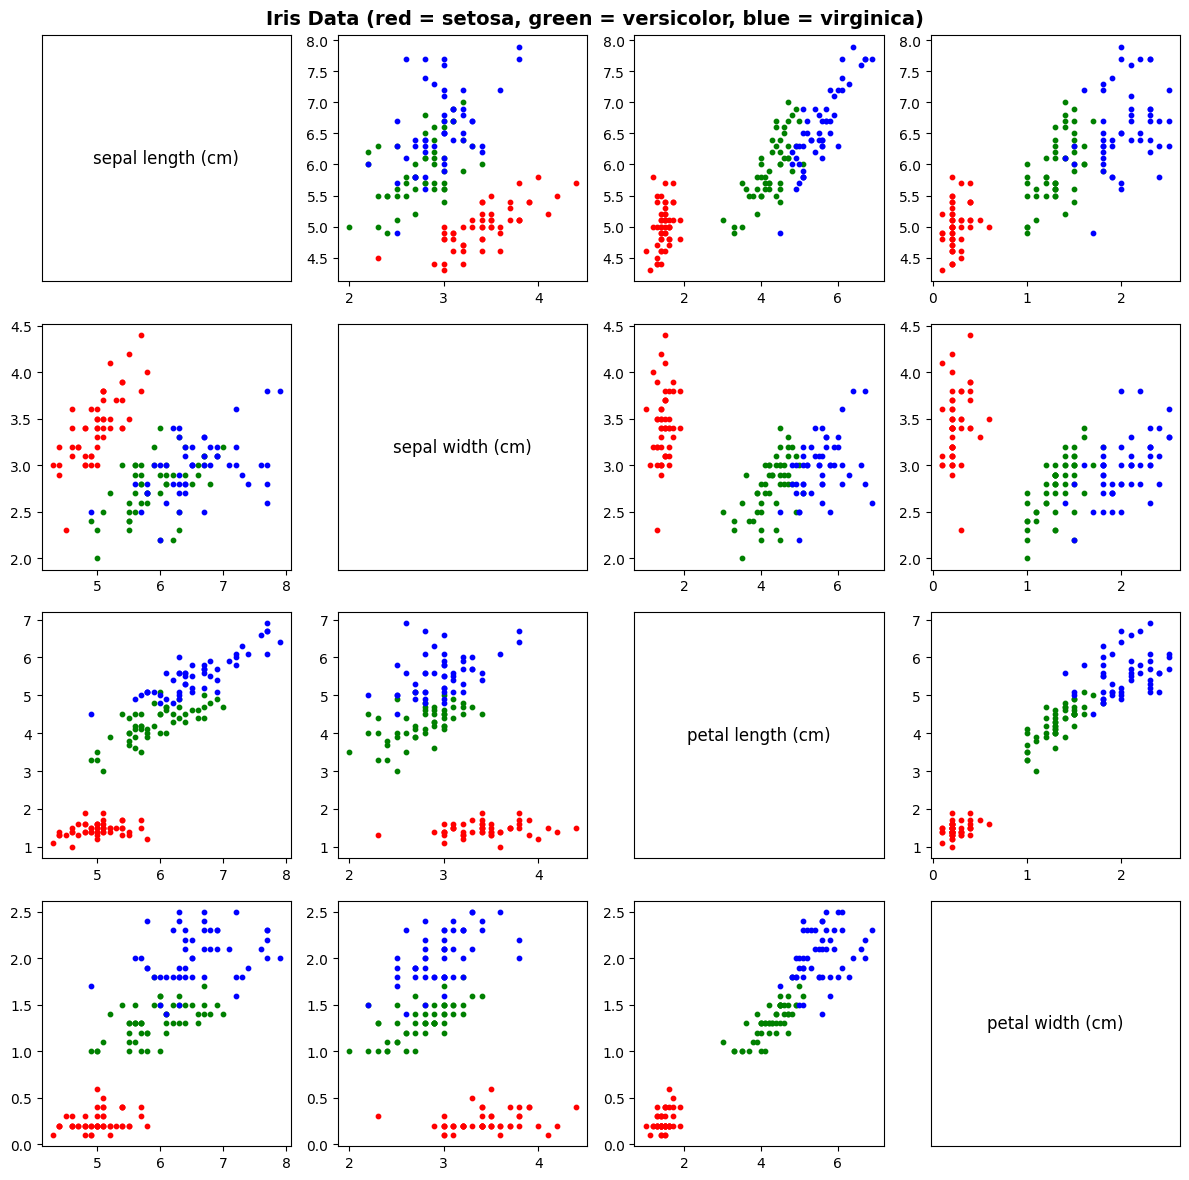

In [ ]:
# Codes for P1-2(a)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

# Define colors for each iris type
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

# Create a figure and axis for the scatter plot matrix
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# List of feature names
feature_names = iris.feature_names

# Loop over each pair of features
for i in range(4):
    for j in range(4):
        ax = axs[i, j]
        if i == j:
            # Diagonal: display feature names
             ax.text(0.5, 0.5, feature_names[i], horizontalalignment='center', verticalalignment='center', fontsize=12)
             ax.set_xticks([])
             ax.set_yticks([])
        else:
            # Off-diagonal: scatter plots
            for k, target_name in enumerate(target_names):
                ax.scatter(data[target == k, j], data[target == k, i], color=colors[target_name], label=target_name, s=10)
                # ax.set_xticks([])
                # ax.set_yticks([])
            # ax.set_xlabel(feature_names[j])
            # ax.set_ylabel(feature_names[i])
        # # Add legend only for the first row of subplots
        # if i == 0:
        #     ax.legend()

# Add title to the entire figure and plot results
plt.suptitle('Iris Data (red = setosa, green = versicolor, blue = virginica)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**(b) Find the best discretization for the petal length and the petal width that can best separate the Iris data and plot a figure similar to the figure in slide 54 in Chapter 2. For each flower type, list in a table how many data samples are correctly separated and how many are not correctly separated.**

  Flower Type  Correctly Separated  Incorrectly Separated
0      setosa                   50                      0
1  versicolor                   48                      2
2   virginica                   38                     14


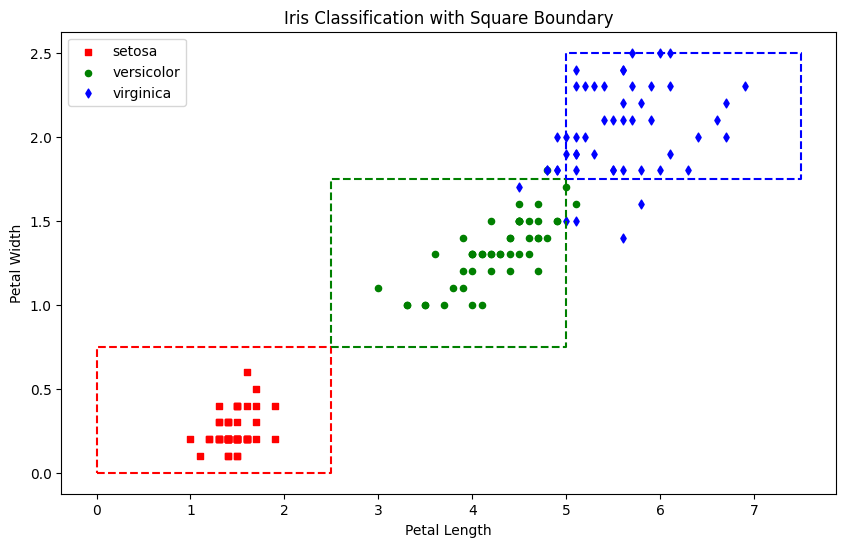

In [1]:
# Codes for P1-2(b)

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

# Extract petal length and petal width
petal_length = data[:, 2]  # 3rd column of data
petal_width = data[:, 3]    # 4th column of data

# Define thresholds for petal length and petal width to categorize as low, medium, or high
petal_length_thresholds = [2.5, 5.0]  # Setosa, Versicolor, Virginica
petal_width_thresholds = [0.75, 1.75]  # Setosa, Versicolor, Virginica

# Function to check if a sample falls in the Setosa, Versicolor, or Virginica boundary
def is_in_setosa_boundary(petal_length, petal_width):
    return petal_length < petal_length_thresholds[0] and petal_width < petal_width_thresholds[0]

def is_in_versicolor_boundary(petal_length, petal_width):
    return (petal_length_thresholds[0] <= petal_length <= petal_length_thresholds[1] and
            petal_width_thresholds[0] <= petal_width <= petal_width_thresholds[1])

def is_in_virginica_boundary(petal_length, petal_width):
    return petal_length > petal_length_thresholds[1] and petal_width > petal_width_thresholds[1]

# Initialize counts for correct and incorrect classifications
correct_counts = [0, 0, 0]  # Setosa, Versicolor, Virginica
incorrect_counts = [0, 0, 0]  # Count for misclassified samples
misclassified_into_other_boundary_counts = [0, 0, 0]  # Misclassified into other flower type's boundary

# Loop through each sample and check its classification based on the square boundary
for i in range(len(target)):
    pl, pw = petal_length[i], petal_width[i]

    if target[i] == 0:  # Setosa
        if is_in_setosa_boundary(pl, pw):
            correct_counts[0] += 1
        else:
            incorrect_counts[0] += 1
            if is_in_versicolor_boundary(pl, pw) or is_in_virginica_boundary(pl, pw):
                misclassified_into_other_boundary_counts[0] += 1

    elif target[i] == 1:  # Versicolor
        if is_in_versicolor_boundary(pl, pw):
            correct_counts[1] += 1
        else:
            incorrect_counts[1] += 1
            if is_in_setosa_boundary(pl, pw) or is_in_virginica_boundary(pl, pw):
                misclassified_into_other_boundary_counts[1] += 1

    elif target[i] == 2:  # Virginica
        if is_in_virginica_boundary(pl, pw):
            correct_counts[2] += 1
        else:
            incorrect_counts[2] += 1
            if is_in_setosa_boundary(pl, pw) or is_in_versicolor_boundary(pl, pw):
                misclassified_into_other_boundary_counts[2] += 1

# Calculate total misclassified counts including those falling into another flower's boundary
total_incorrect_counts = [incorrect_counts[i] + misclassified_into_other_boundary_counts[i] for i in range(3)]

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Flower Type': target_names,
    'Correctly Separated': correct_counts,
    'Incorrectly Separated': total_incorrect_counts,
    # 'Misclassified into Other Flower\'s Boundary': misclassified_into_other_boundary_counts
})

# Print the DataFrame/Table
print(results_df)

# Plot the boundaries and misclassified points (optional)
colors = ['red', 'green', 'blue']
markers = ['s', 'o', 'd']  # Square for Setosa, Circle for Versicolor, Diamond for Virginica

# Create a figure
plt.figure(figsize=(10, 6))

# Plot each classified group
for i in range(3):
    plt.scatter(petal_length[target == i], petal_width[target == i],
                color=colors[i], label=target_names[i], marker=markers[i], s=20)

# Plot square separation boundaries
plt.plot([0, petal_length_thresholds[0], petal_length_thresholds[0], 0, 0],
         [0, 0, petal_width_thresholds[0], petal_width_thresholds[0], 0],
         linestyle='--', color='red')

plt.plot([petal_length_thresholds[0], petal_length_thresholds[1], petal_length_thresholds[1], petal_length_thresholds[0], petal_length_thresholds[0]],
         [petal_width_thresholds[0], petal_width_thresholds[0], petal_width_thresholds[1], petal_width_thresholds[1], petal_width_thresholds[0]],
         linestyle='--', color='green')

plt.plot([petal_length_thresholds[1], 7.5, 7.5, petal_length_thresholds[1], petal_length_thresholds[1]],
         [petal_width_thresholds[1], petal_width_thresholds[1], 2.5, 2.5, petal_width_thresholds[1]],
         linestyle='--', color='blue')

# Add Labels and title
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Classification with Square Boundary')
plt.legend()
plt.show()


Discuss your results here:

The code imports necessary libraries, including numpy, pandas, matplotlib and sklearn, to analyze the Iris dataset, which includes measurements of iris flowers across three species: Setosa, Versicolor, and Virginica. Thresholds are set for petal length and petal width to create square boundaries for classifying each species: Setosa (<2.5 cm length or <0.75 cm width), Versicolor (length within 2.5-5 cm and width 0.75-1.75 cm ranges), and Virginica (>5.0 cm length and >1.75 cm width). Classification involves checking each sample's petal length and width against predefined boundaries, tracking the results as follows:
Correct Counts: Number of samples correctly classified within their species' boundary for specified threshold.
Incorrect Counts: Samples that fall outside their boundary for specified threshold, including those misclassified into another species' boundary for specified threshold.
Using petal length and width thresholds, Setosa samples were classified correctly. However, for Versicolor and Virginica, some samples were misclassified, either falling outside their designated boundaries or into the boundary of another flower type.
The code counts correct and incorrect classifications, displaying the results in a DataFrame as a Table. Table represents the correctly classified and misclassified samples for each flower types for total 150 samples.
With the different Threshold value this number changes for classified and misclassified samples. Scatter plot represents classified samples using different colors and marker shapes for each species.


# **P1-3. Principal Component Analysis for The Iris Dataset**

**(a) Use the Iris dataset and plot all the samples in a figure using Sepal Length and Sepal Width, i.e., xlabel('Sepal length') and ylabel('Sepal width').**

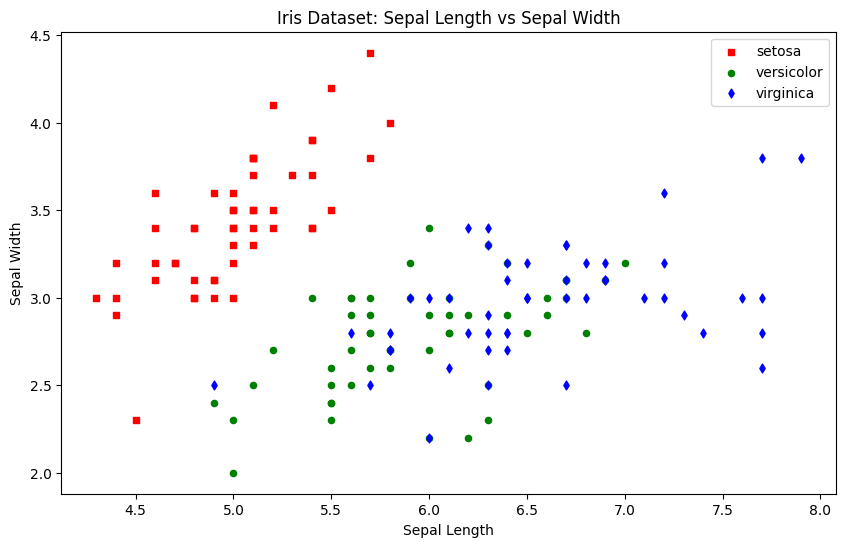

In [ ]:
# Codes for P1-3(a)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

# Extract sepal length and sepal width
sepal_length = data[:, 0]  # 1st column of data
sepal_width = data[:, 1]    # 2nd column of data

# Colors and markers for each flower type
colors = ['red', 'green', 'blue']
markers = ['s', 'o', 'd']  # Square for Setosa, Circle for Versicolor, Diamond for Virginica

# Create a figure
plt.figure(figsize=(10, 6))

# Plot each species with different colors and markers
for i in range(3):
    plt.scatter(sepal_length[target == i], sepal_width[target == i],
                color=colors[i], label=target_names[i], marker=markers[i], s=20)

# Add labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset: Sepal Length vs Sepal Width')
plt.legend()
# plt.grid()
plt.show()

**(b)The Iris dataset has 4 attributes (sepal length, sepal width, petal length, and petal width). Use PCA to reduce the dimension of the dataset from 4 to 2. Plot all the samples after the dimensionality reduction in a 2D figure. Compare this figure with the figure in (a) and discuss whether you can better separate the data samples after the dimensionality reduction.**

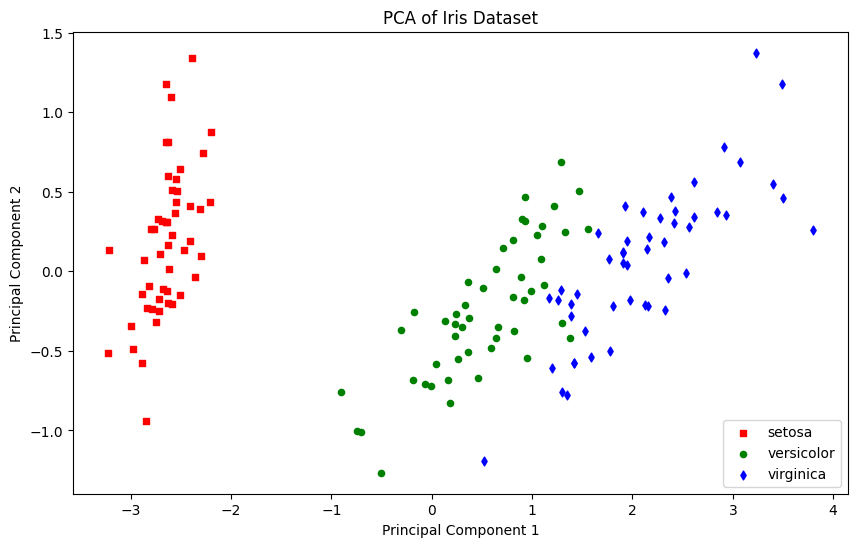

In [ ]:
# Codes for P1-3(b)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

# Apply PCA to reduce the dimensionality from 4 to 2
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(data)

# Transform the data using the fitted PCA model
reduced_data = pca.transform(data)

# fit and transform method together
# reduced_data = pca.fit_transform(data)

# Colors and markers for each flower type
colors = ['red', 'green', 'blue']
markers = ['s', 'o', 'd']

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the PCA results
for i in range(3):
    plt.scatter(reduced_data[target == i, 0], reduced_data[target == i, 1],
                color=colors[i], label=target_names[i], marker=markers[i], s=20)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
# plt.grid()
plt.show()

Discuss your results here:

P1-3: Code (a) Creates a scatter plot using the first two features (sepal length and sepal width). It shows three groups of iris species (Setosa, Versicolor, and Virginica) with different colors and shapes. Setosa is easily separable from the other two due to its smaller sepal dimensions, while Versicolor and Virginica overlap, making it challenging to classify them based solely on sepal dimensions.
P1-3: Code (b) applies PCA to reduce the four-dimensional feature space of the Iris dataset to two dimensions, followed by plotting the results. The scatter plot visualizes the data in the new PCA space, with each point representing an iris flower colored by species. PCA captures the most variance in the data and projects it onto two principal components. The plot shows Setosa as well-separated, similar to Code A. PCA aims to maximize variance, which can sometimes result in improved separation of Versicolor and Virginica compared to their separation based solely on sepal dimensions.
In Code B, PCA allows for a transformation of the feature space that can reveal additional structure in the data. Depending on the original relationships among features, PCA can enhance the separability of the clusters by capturing the directions of maximum variance. PCA effectively condenses information by retaining the most significant variance, which might enable better separation of classes that were previously overlapping in the original feature space.
The visualization from PCA can also highlight patterns that might not be visible when examining individual attributes. PCA often provides a clearer distinction between classes, especially for datasets with non-linear relationships, by projecting the data into a space where the separation is maximized. In the case of the Iris dataset, PCA offers better separation between Versicolor and Virginica.
